# Experimentação

Importing the necessaries libraries

In [112]:
import pandas as pd
from scipy.linalg import svd, diagsvd
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import copy


Importing data from a csv file

In [113]:
ratings = pd.read_csv('data/ratings_small.csv', encoding='utf-8', sep=',')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


Dataframe to matrix:  Userid x Movieid

In [114]:
matrix = ratings.pivot(index='userId', columns='movieId', values='rating')
matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
669,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Identificando um valor X na matrix em uma posição específica ij

In [115]:
A = matrix.values
linha = 670
coluna = 0
A[linha][coluna]

5.0

## Passo 1
Vamos escolher aleatoriamente um dos elementos da matriz $A$ e atribuir a ele um valor aleatório, gerando a matriz $B$, isto é, a matriz $B$ é igual à matriz $A$ com um dos elementos "estragado".

In [116]:
linha = 670
coluna = 0
B = copy.deepcopy(matrix)
B.fillna(0, inplace=True)
B = B.values

B[linha][coluna] = 1

print(f"Valor original da linha {linha}, coluna {coluna} na Matriz A: {A[linha][coluna]}")
print(f"Valor novo com ruído linha {linha}, coluna {coluna} na Matriz B: {B[linha][coluna]}")


Valor original da linha 670, coluna 0 na Matriz A: 5.0
Valor novo com ruído linha 670, coluna 0 na Matriz B: 1.0


Lista de indices (i,j) dos valores na matriz A, ou seja as posições dos valores que não s .

In [117]:
def indices_validos(A):
    indices = []
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if not math.isnan(A[i][j]):
                indices.append((i, j))
    return indices

valid_indices = indices_validos(A)


O sistema receberá como entrada a matriz $B$ e a posição $i,j$ do valor aleatório. Neste momento, ele não teve acesso à matriz $A$, e, portanto, não tem como saber qual é o valor "real".


O sistema deverá retornar o valor real que estava na matriz $A$.

In [118]:
def calcula_diff_predicao(matriz, indices_validos):
    # ponto valor válido aleatório
    ponto_aleatorio = random.choice(indices_validos)
    # linha e coluna do ponto aleatório
    linha, coluna = ponto_aleatorio[0], ponto_aleatorio[1]
    # valor original do ponto aleatório
    valor_original = matriz[linha][coluna]
    # criando um ruido
    matriz[linha][coluna] = random.randint(1, 5)
    # decomposição da matriz
    u, s, vt = svd(matriz)
    s = s
    # reduzindo a matriz
    s[-100:] *= 0
    # reconstruindo a matriz
    sigma = diagsvd(s, u.shape[1], vt.shape[0])
    newMatriz = u @ sigma @ vt
    # retorna a diferença absoluta entre o valor original e o valor predito
    return abs(valor_original - newMatriz[linha][coluna])



# Aplicação

Gerando um dataframe com os dados do Dataset

In [119]:
ratings = pd.read_csv('data/ratings_small.csv', encoding='utf-8', sep=',')
userID_movieID = ratings.pivot(index='userId', columns='movieId', values='rating')

Retirando a lista dos indices dos valores do dataset

In [120]:
indices_valores = indices_validos(userID_movieID.values)

Substituindo 0 por valores NaN e gerando a matriz B

In [121]:
matrix_inicial = userID_movieID
matrix_inicial.fillna(0, inplace=True)
matrix_inicial = matrix_inicial.values

Iterações: Repitindo o processo acima n vezes, teremos uma lista dos erros do sistema. Sendo o erro dado pela diferença entre o valor real e o valor estimado.

In [122]:
df = pd.DataFrame(columns=['erro'])
diferenças = []
n = 5
for i in range(n):
    df.loc[i] = calcula_diff_predicao(matrix_inicial,indices_valores)
    print(f'Iteração {i} concluída')

df.to_csv('data/resultado.csv', index=False)

Iteração 0 concluída
Iteração 1 concluída
Iteração 2 concluída
Iteração 3 concluída
Iteração 4 concluída


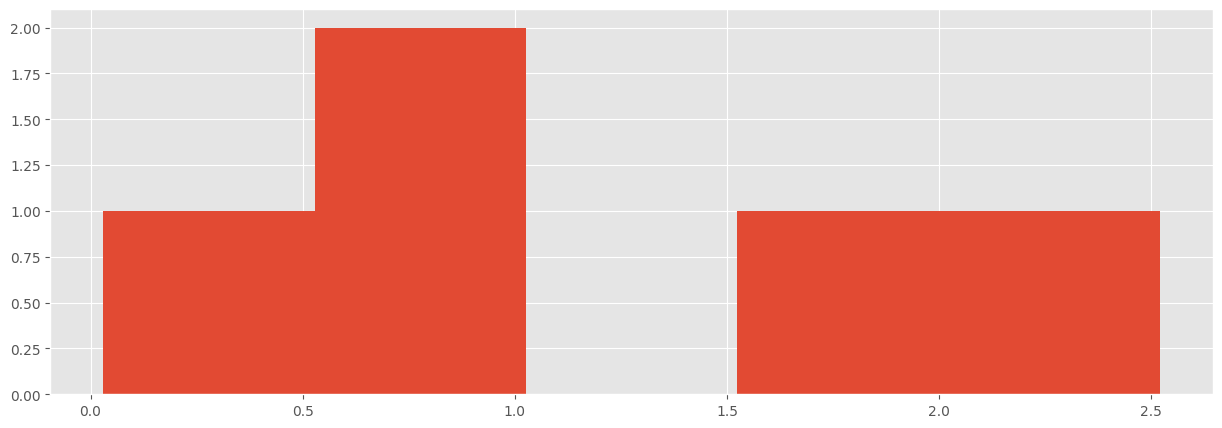

In [133]:
plt.figure(figsize=(15, 5))
plt.style.use('ggplot')
plt.hist(df['erro'], bins=5)
plt.show()

Teste de Stress

In [ ]:
df = pd.DataFrame(columns=['erro'])
diferenças = []
n = 5
for i in range(n):
    df.loc[i] = calcula_diff_predicao(matrix_inicial,indices_valores)
    print(f'Iteração {i} concluída')

df.to_csv('data/resultado.csv', index=False)